# Machine Learning with Scikit Learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

## Linear Regression in Machine Learning

#### House Price Prediction Model

In [ ]:
data= pd.read_csv('../CSV/housing.csv')

features= ['bedrooms','bathrooms','sqft_living']
target= 'price'

X= data[features]
Y= data[target].astype(int)

X_train, X_test, Y_train, Y_test= train_test_split(X,Y)

model= LinearRegression()
model.fit(X_train,Y_train)

input= [[5, 3,3650]]
predictions= model.predict(input)
# predictions= model.predict(X_test)

print(f'Total Price: { predictions[0]:.2f}')


#### Model to predict Population of a country

In [ ]:
# wp= pd.read_csv('../CSV/world_population.csv')
data = {
    'Year': [2022, 2020,2015, 2010, 2000, 1990, 1980,1970],
    'Population': [1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301]  # Example: India
}

data = pd.DataFrame(data)

X= data[['Year']]
Y= data['Population']

X_train, X_test, Y_train, Y_test= train_test_split(X,Y)

model= LinearRegression()
model.fit(X_train,Y_train)

input= [[2025]]
predictions= model.predict(input)

# print(predictions)
print(f'Population: { predictions[0]:.0f}')



##### Datasets in sklearn

In [ ]:
from sklearn.datasets import load_digits

X,Y= load_digits(return_X_y=True)

print(X,Y)

In [ ]:
# 1. Linear Regression(Single Regression, Multiple Regression)
# 2. Logistic Regression (Binary Classification, Multi-class Classification, ) 

#### Model to predict price of used Car

In [ ]:
carsData= pd.read_csv('../datasets/car_dataset.csv')

X = carsData[['car_name','brand','car_model','model_year','transmission','fuel_type','kilometers_run']]
Y= carsData['price']

x_train,x_test, y_train,y_test= train_test_split(X,Y)

model= LinearRegression()

model.fit(x_train,y_train)

input= [[5, 3,3650]]
predictions= model.predict(x_test)

print(f'Total Price: { predictions[0]:.2f}')

## Logistic Regression

##### 1. Predict student fail or pass by using Study Hours

In [ ]:
# study hours
X= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14]).reshape(-1,1)
# fail, pass
Y= np.array([0,0,0,1,1,0,1,1,0,1,1,0,1,1])

model= LogisticRegression()

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, random_state=42)

# print(X_test)

model.fit(X_train,Y_train)

studyhour= [[8]]
predictions= model.predict(studyhour)

# Checking Probability

probability= model.predict_proba(studyhour)

# probability[:,1]
print(f"{probability[0][1]:.2f}")
# print("Preductuion",predictions)

In [ ]:
## Create Graph for above example

x_test= np.linspace(0, 15, 100).reshape(-1,1)
y_prob= model.predict_proba(x_test)

# print(y_prob[:,1])

plt.scatter(X,Y, color='blue')
plt.scatter(studyhour, probability[0][1], color='green', marker='o', s=100, label='Prediction')
plt.plot(x_test, y_prob[:,1],color='red')

#Labels
plt.xlabel('Study Hours')
plt.ylabel('Pass/Fail')
plt.title('Logistic Regression: Study Hours vs Pass/Fail')

# Central line
plt.axhline(0.5, color='green', linestyle='--', label='Decision Boundary')
plt.show()




##### 2. Predicting Cancer

In [ ]:
from sklearn.datasets import load_breast_cancer

X,Y= load_breast_cancer(return_X_y=True)

x_train, x_test, y_train, y_test= train_test_split(X,Y, random_state=42)

model = LogisticRegression()
model.fit(x_train,y_train)

# input= [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.9, 1.0]]
predictions= model.predict(x_test)

print(predictions)

## Polynomial Regression


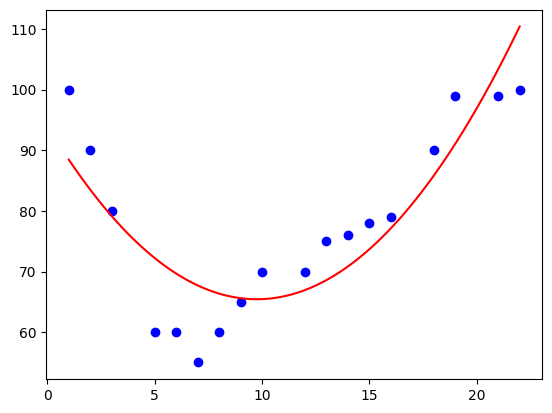

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array([1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]).reshape(-1,1)
y = np.array([100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100])

poly= PolynomialFeatures(degree=2)

x_poly= poly.fit_transform(x)

model= LinearRegression()

model.fit(x_poly,y)

# prediction= model.predict(x_poly)

x_test= np.linspace(1, 22, 100).reshape(-1,1)
x_test_poly=poly.fit_transform(x_test)
# //
y_predict= model.predict(x_test_poly)
plt.scatter(x,y, color='blue')

# predicted line
plt.plot(x_test, y_predict, color='red')
# print(prediction)
# print(x_poly)